Test

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from matplotlib import animation
from IPython.display import HTML

In [2]:
def FOC_clarkTransform(i_a, i_b, i_c):
    i_alpha  = (1. / 3.)           * (2. * i_a - i_b - i_c)
    i_beta   = (1. / np.sqrt(3.))  * (i_b - i_c)
    return i_alpha, i_beta

def FOC_parkTransform(i_alpha, i_beta, sin_theta, cos_theta):
    i_q  = -(sin_theta * i_alpha) + (cos_theta * i_beta)
    i_d  =  (cos_theta * i_alpha) + (sin_theta * i_beta)
    return i_q, i_d

def FOC_invParkTransform(v_q, v_d, sin_theta, cos_theta):
    v_alpha  = -(sin_theta * v_q) + (cos_theta * v_d)
    v_beta   =  (cos_theta * v_q) + (sin_theta * v_d)
    return v_alpha, v_beta

def FOC_invClarkSVPWM(v_alpha, v_beta):
    v_a_phase = v_alpha
    v_b_phase = (-.5 * v_alpha) + ((np.sqrt(3.)/2.) * v_beta)
    v_c_phase = (-.5 * v_alpha) - ((np.sqrt(3.)/2.) * v_beta)

    v_neutral = .5 * (np.maximum(np.maximum(v_a_phase, v_b_phase), v_c_phase)
                      + np.minimum(np.minimum(v_a_phase, v_b_phase), v_c_phase))

    v_a = v_a_phase - v_neutral
    v_b = v_b_phase - v_neutral
    v_c = v_c_phase - v_neutral
    return v_a, v_b, v_c

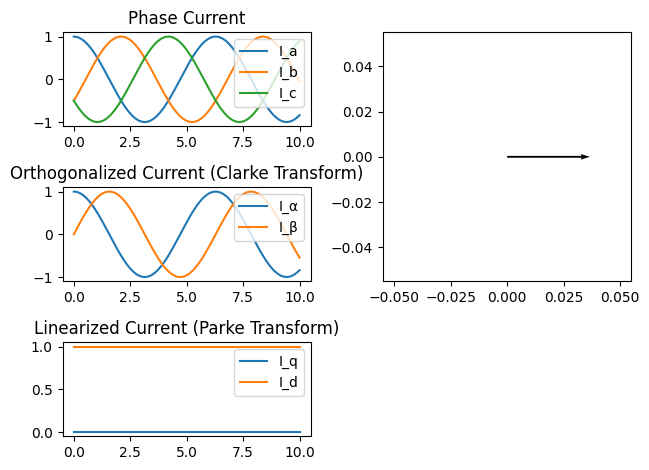

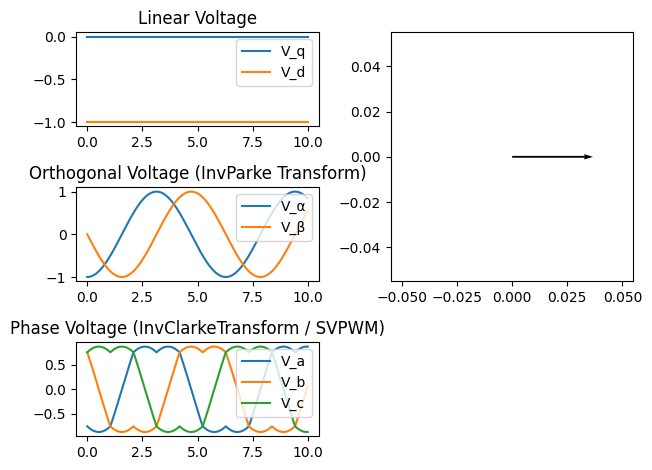

In [63]:
# time series
t = np.linspace(0, 10, 1000)
theta = t

def FOC_loop(t, theta):
    # phase data
    i_a = np.cos(t)
    i_b = np.cos(t + 2./3. * 2 * np.pi)
    i_c = np.cos(t - 2./3. * 2 * np.pi)

    i_alpha, i_beta = FOC_clarkTransform(i_a, i_b, i_c)
    i_q, i_d = FOC_parkTransform(i_alpha, i_beta, np.sin(theta), np.cos(theta))

    v_q = 0 - i_q
    v_d = 0 - i_d

    v_alpha, v_beta = FOC_invParkTransform(v_q, v_d, np.sin(theta), np.cos(theta))

    v_a, v_b, v_c = FOC_invClarkSVPWM(v_alpha, v_beta)

    return i_a, i_b, i_c, i_alpha, i_beta, i_q, i_d, v_q, v_d, v_alpha, v_beta, v_a, v_b, v_c

i_a, i_b, i_c, i_alpha, i_beta, i_q, i_d, v_q, v_d, v_alpha, v_beta, v_a, v_b, v_c = FOC_loop(t, theta)



fig = plt.figure()
plt.subplot(3, 2, 1)
i_a_line, = plt.plot(t, i_a, label="I_a")
i_b_line, = plt.plot(t, i_b, label="I_b")
i_c_line, = plt.plot(t, i_c, label="I_c")
plt.legend(loc="upper right")
plt.title("Phase Current")

plt.subplot(3, 2, 3)
i_alpha_line, = plt.plot(t, i_alpha, label="I_α")
i_beta_line, = plt.plot(t, i_beta, label="I_β")
plt.legend(loc="upper right")
plt.title("Orthogonalized Current (Clarke Transform)")

plt.subplot(3, 2, 5)
i_q_line, = plt.plot(t, i_q, label="I_q")
i_d_line, = plt.plot(t, i_d, label="I_d")
plt.legend(loc="upper right")
plt.title("Linearized Current (Parke Transform)")

plt.subplot(3, 2, (2, 4))
i_quiver = plt.quiver(0, 0, np.cos(theta[0]), np.sin(theta[0]), scale=3)

plt.tight_layout()
plt.show()


plt.subplot(3, 2, 1)
plt.plot(t, v_q, label="V_q")
plt.plot(t, v_d, label="V_d")
plt.legend(loc="upper right")
plt.title("Linear Voltage")

plt.subplot(3, 2, 3)
plt.plot(t, v_alpha, label="V_α")
plt.plot(t, v_beta, label="V_β")
plt.legend(loc="upper right")
plt.title("Orthogonal Voltage (InvParke Transform)")

plt.subplot(3, 2, 5)
plt.plot(t, v_a, label="V_a")
plt.plot(t, v_b, label="V_b")
plt.plot(t, v_c, label="V_c")
plt.legend(loc="upper right")
plt.title("Phase Voltage (InvClarkeTransform / SVPWM)")

plt.subplot(3, 2, (2, 4))
plt.quiver(0, 0, np.cos(theta[0]), np.sin(theta[0]), scale=3)

plt.tight_layout()
plt.show()

n_frames = 100

def drawframe(n):
    base_t = np.linspace(0, 10, 1000)
    dt = ((2 * np.pi) * (n / n_frames))
    theta = base_t + dt
    i_a, i_b, i_c, i_alpha, i_beta, i_q, i_d, v_q, v_d, v_alpha, v_beta, v_a, v_b, v_c = FOC_loop(base_t + dt, theta)
    i_a_line.set_data(base_t, np.flip(i_a))
    i_b_line.set_data(base_t, np.flip(i_b))
    i_c_line.set_data(base_t, np.flip(i_c))
    i_alpha_line.set_data(base_t, np.flip(i_alpha))
    i_beta_line.set_data(base_t, np.flip(i_beta))
    i_q_line.set_data(base_t, np.flip(i_q))
    i_d_line.set_data(base_t, np.flip(i_d))
    i_quiver.set_UVC(np.cos(theta[0]), np.sin(theta[0]))
    #pt1.set_data(y1[0],y2[0])
    #txt_title.set_text('Frame = {0:4d}'.format(n))
    return (i_a_line, i_b_line, i_c_line, i_quiver)

# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=100, interval=20, blit=True)

In [64]:
HTML(anim.to_html5_video())

In [66]:
anim.save("animation.gif", fps=30)